In [3]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize, poly
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [4]:
dataset: pd.DataFrame = load_data("Auto")
dataset[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [5]:
# dataset["horsepower"] = np.log(dataset["horsepower"])
# dataset["horsepower"]

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

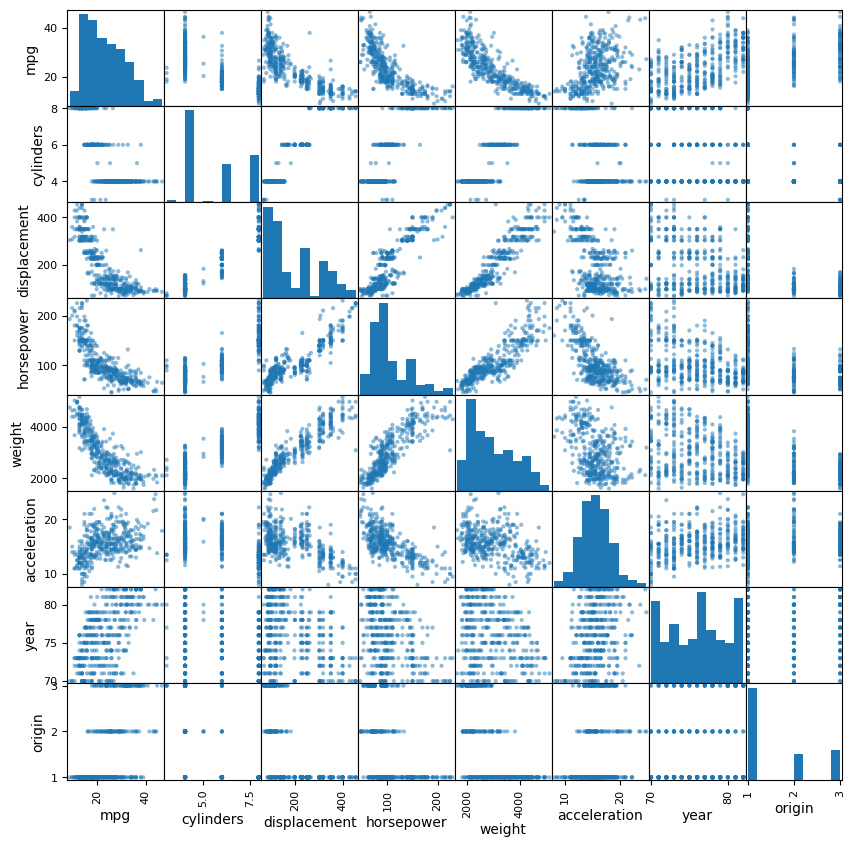

In [6]:
pd.plotting.scatter_matrix(dataset, figsize=(10, 10))

In [7]:
dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [8]:
total_design = ModelSpec(dataset.columns.drop(["mpg"]))
X = total_design.fit_transform(dataset)
Y = dataset["mpg"]

In [48]:
total_model = sm.OLS(Y, X)
total_results = total_model.fit()
print(f"{total_results.rsquared=}")
# summarize(total_results)
total_results.summary()

total_results.rsquared=0.8214780764810597


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        11:18:10   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
variables = dataset.columns.drop(["mpg"])
individual_designs = [ModelSpec([column]) for column in variables]
# individual_designs = [ModelSpec([column]) for column in ["mpg"]]
individual_Xs = [design.fit_transform(dataset) for design in individual_designs]
individual_models = [sm.OLS(Y, x) for x in individual_Xs]
individual_results = [model.fit() for model in individual_models]

for idx, result in enumerate(individual_results):
    print(f"For '{variables[idx]}'")
    print(f"R squared = {result.rsquared}")
    print(summarize(result))
    print("--------\n")

For 'cylinders'
R squared = 0.6046889889441246
              coef  std err       t  P>|t|
intercept  42.9155    0.835  51.404    0.0
cylinders  -3.5581    0.146 -24.425    0.0
--------

For 'displacement'
R squared = 0.6482294003193044
                 coef  std err       t  P>|t|
intercept     35.1206    0.494  71.033    0.0
displacement  -0.0601    0.002 -26.808    0.0
--------

For 'horsepower'
R squared = 0.6059482578894348
               coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0
--------

For 'weight'
R squared = 0.6926304331206254
              coef  std err       t  P>|t|
intercept  46.2165    0.799  57.867    0.0
weight     -0.0076    0.000 -29.645    0.0
--------

For 'acceleration'
R squared = 0.1792070501562546
                coef  std err      t  P>|t|
intercept     4.8332    2.048  2.359  0.019
acceleration  1.1976    0.130  9.228  0.000
--------

For 'year'
R squared = 0.3370278133096227
         

In [11]:
comparasion = anova_lm(*individual_results)
comparasion.index = variables
comparasion

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
cylinders,390.0,9415.910391,0.0,NaN,NaN,NaN
displacement,390.0,8378.821617,-0.0,1037.088774,-inf,NaN
horsepower,390.0,9385.915872,-0.0,-1007.094255,inf,NaN
weight,390.0,7321.233706,-0.0,2064.682166,-inf,NaN
acceleration,390.0,19550.461912,-0.0,-12229.228206,inf,NaN
year,390.0,15791.330185,-0.0,3759.131727,-inf,NaN
origin,390.0,16209.755458,-0.0,-418.425272,inf,NaN


In [12]:
for idx, result in enumerate(individual_results):
    print(f"p-value for '{variables[idx]}' = {result.pvalues.iloc[0]:.4f}")


p-value for 'cylinders' = 0.0000
p-value for 'displacement' = 0.0000
p-value for 'horsepower' = 0.0000
p-value for 'weight' = 0.0000
p-value for 'acceleration' = 0.0188
p-value for 'year' = 0.0000
p-value for 'origin' = 0.0000


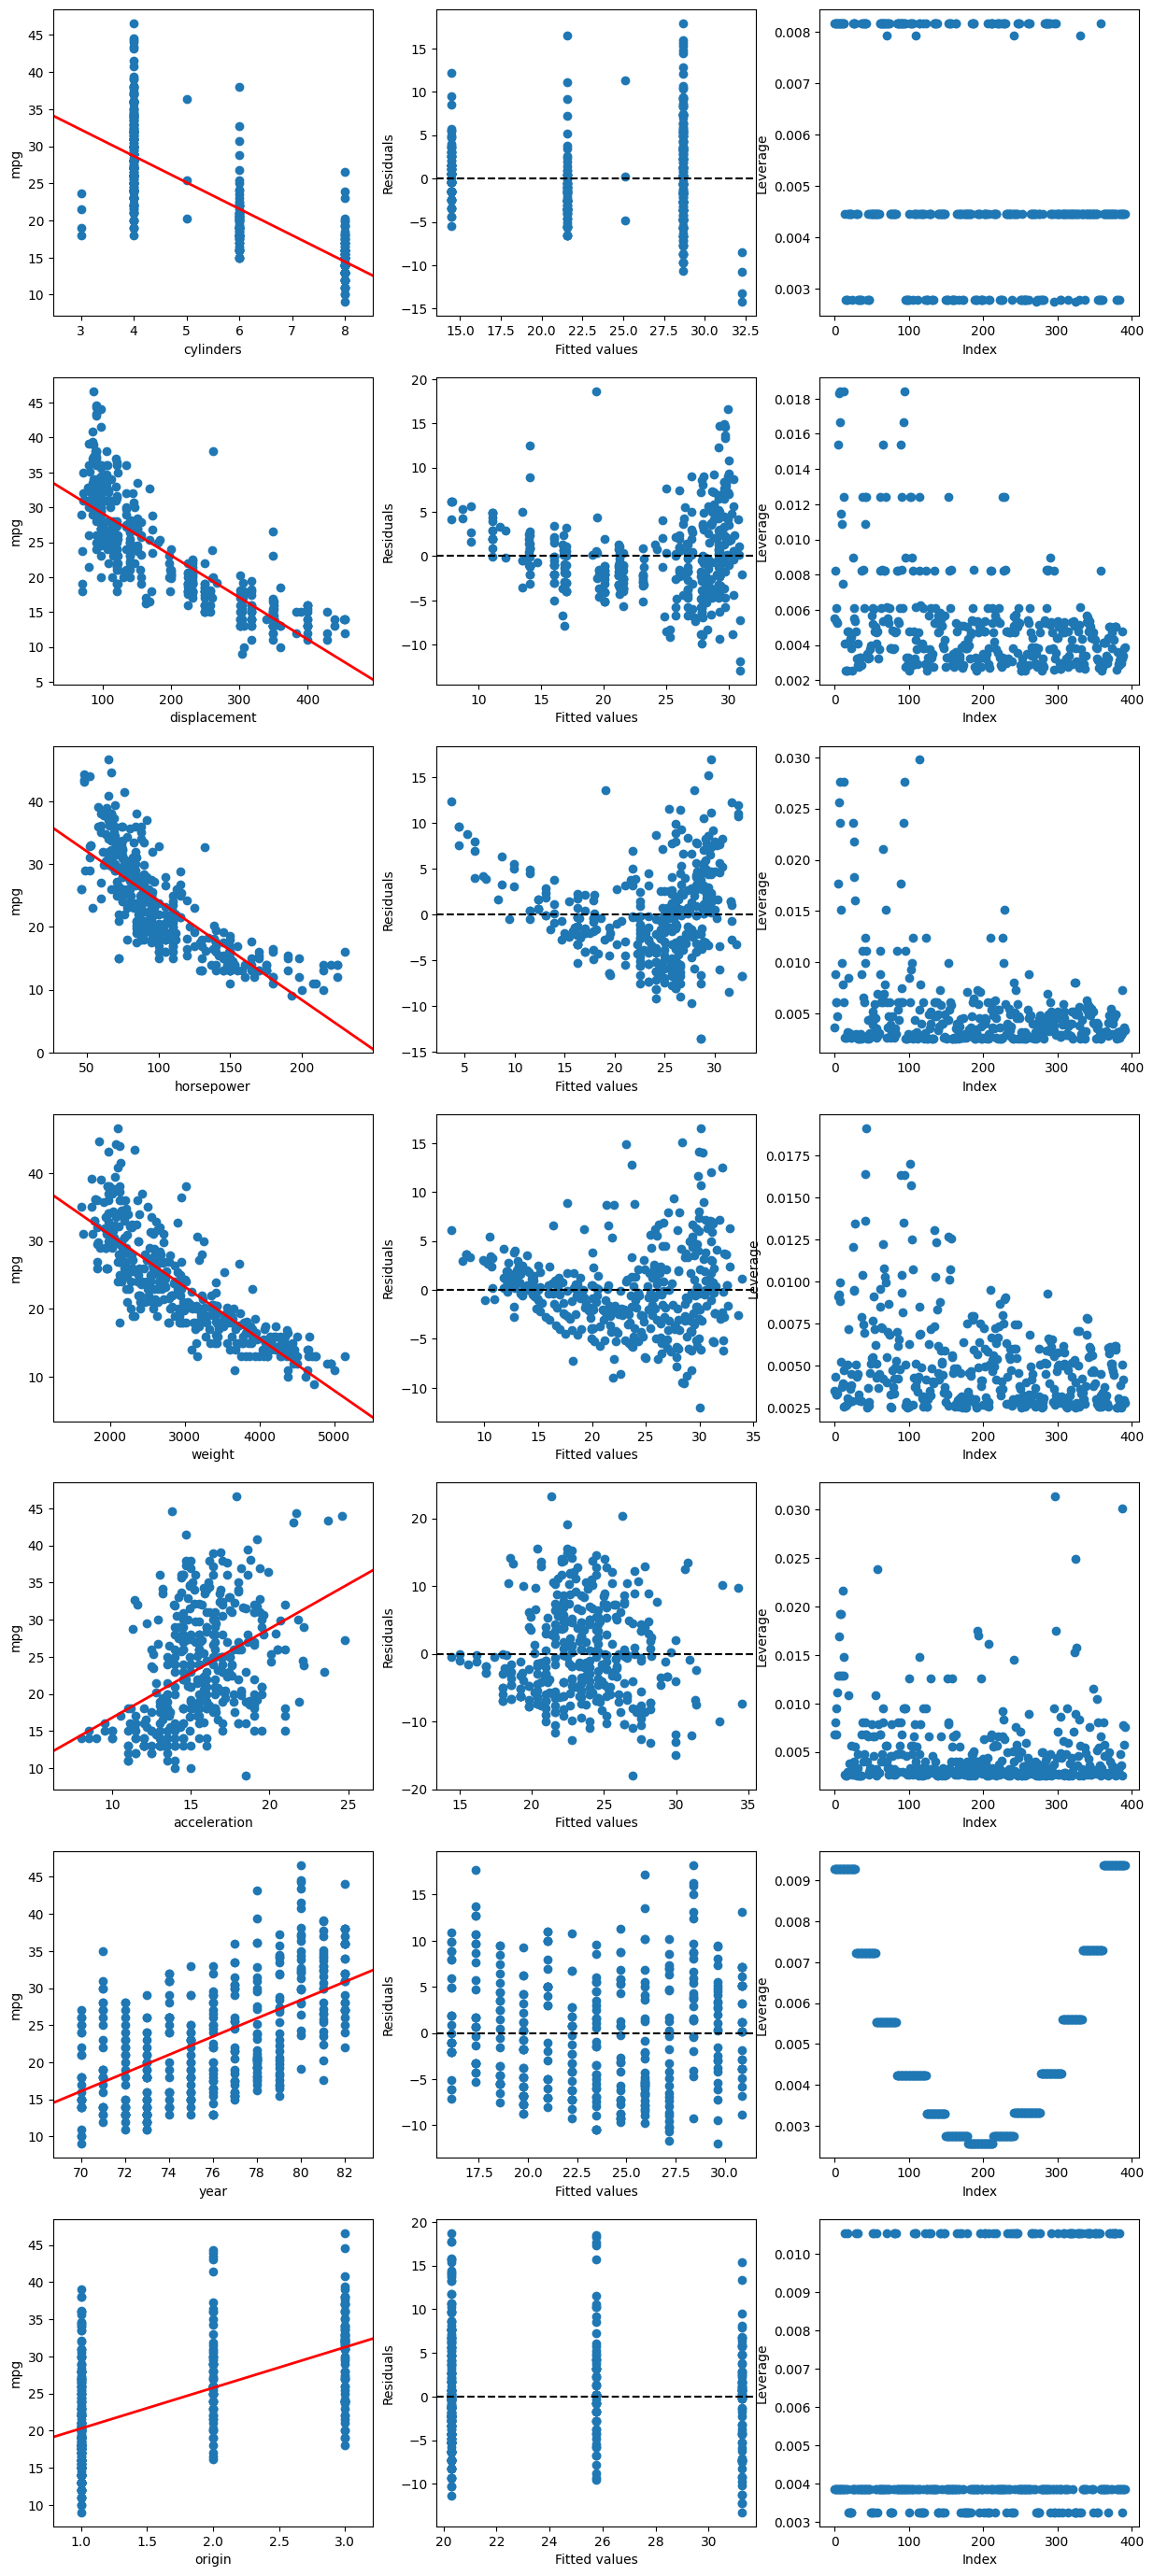

In [13]:
axs = subplots(len(variables), 3, figsize=(5*3, 5*len(variables)))[1]

for idx, ax_row in enumerate(axs):
    ax = ax_row[0]
    var = variables[idx]
    ax.scatter(X[var], Y)
    ax.set_xlabel(var)
    ax.set_ylabel("mpg")

    result = individual_results[idx]
    b = result.params.iloc[0]
    m = result.params.iloc[1]
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] + b, m*xlim[1] + b]
    ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), c="r", ls="-", linewidth=2)

    ax = ax_row[1]
    ax.scatter(result.fittedvalues, result.resid)
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")
    ax.axhline(0, c="k", ls="--")

    ax = ax_row[2]
    infl = result.get_influence()
    ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage')
    np.argmax(infl.hat_matrix_diag)

In [14]:
design3 = ModelSpec(["weight", "cylinders", "displacement", ("cylinders", "displacement"), "horsepower"])
X_3 = design3.fit_transform(dataset)

model3 = sm.OLS(Y, X_3)
result3 = model3.fit()
print(f"{result3.rsquared=}")
summarize(result3)

result3.rsquared=0.7399582234449827


,coef,std err,t,P>|t|
intercept,60.0290,2.512,23.901,0.0
weight,-0.0038,0.001,-5.426,0.0
cylinders,-2.8363,0.523,-5.418,0.0
displacement,-0.0974,0.016,-5.919,0.0
cylinders:displacement,0.0146,0.002,6.925,0.0
horsepower,-0.0828,0.013,-6.155,0.0


In [57]:
terms4 = dataset.columns.drop(["mpg"]).tolist() + [("cylinders", "displacement"), ("horsepower", "weight"), ("weight", "cylinders"), ("horsepower", "displacement")]
# terms4 = dataset.columns.drop(["mpg"]).tolist() + [("cylinders", "displacement", "horsepower", "weight")]
design4 = ModelSpec(terms4)
X_4 = design4.fit_transform(dataset)
Y = dataset["mpg"]
model4 = sm.OLS(Y, X_4)
result4 = model4.fit()
print(f"{result4.rsquared=}")
# summarize(result4)
result4.summary()

result4.rsquared=0.8665170878411002


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):          1.31e-158
Time:                        11:30:50   Log-Likelihood:                -966.49
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     380   BIC:                             2005.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                   4.5827      4.963      0.923      0.356      -5.176      14.341
cylinders                  -1.2385      1.148     -1.079      0.281      -3.495       1.018
displacement               -0.0327      0.023     -1.447      0.149      -0.077       0.012
horsepower                 -0.1731      0.042     -4.110      0.000      -0.256      -0.090
weight                     -0.0087      0.002     -3.962      0.000      -0.013      -0.004
acceleration               -0.1456      0.095     -1.536      0.125      -0.332       0.041
year                        0.7549      0.045     16.871      0.000       0.667       0.843
origin                      0.6827      0.257      2.658      0.008       0.178       1.188
cylinders:displacement     -0.0034      0.004     -0.809      0.419      -0.012       0.005
horsepower:weight        4.277e-06   1.82e-05      0.235      0.814   -3.14e-05       4e-05
weight:cylinders            0.0007      0.001      1.374      0.170      -0.000       0.002
horsepower:displacement     0.0004      0.000      3.086      0.002       0.000       0.001
==============================================================================
Omnibus:                       47.995   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.962
Skew:                           0.675   Prob(JB):                     5.34e-22
Kurtosis:                       5.043   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
anova_lm(total_results, result4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3214.623309,1.0,1037.589222,123.621536,4.452163e-25


In [17]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif": vals}, index=X.columns[1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


In [68]:
terms5 = ["weight"]
design5 = ModelSpec(terms5)
X_5 = design5.fit_transform(dataset)
Y = dataset["mpg"]
model5 = sm.OLS(Y, X_5)
result5 = model5.fit()
print(f"{result5.rsquared=}")
summarize(result5)

result5.rsquared=0.6926304331206254


,coef,std err,t,P>|t|
intercept,46.2165,0.799,57.867,0.0
weight,-0.0076,0.000,-29.645,0.0


In [67]:
terms6 = [poly("weight", degree=2, raw=True)]
design6 = ModelSpec(terms6)
X_6 = design6.fit_transform(dataset)
Y = dataset["mpg"]
model6 = sm.OLS(Y, X_6)
result6 = model6.fit()
print(f"{result6.rsquared=}")
summarize(result6)

result6.rsquared=0.7151475557845139


,coef,std err,t,P>|t|
intercept,62.255500,2.993000e+00,20.800,0.0
"poly(weight, degree=2, raw=True)[0]",-0.018500,2.000000e-03,-9.379,0.0
"poly(weight, degree=2, raw=True)[1]",0.000002,3.060000e-07,5.545,0.0


In [69]:
anova_lm(result5, result6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,7321.233706,0.0,NaN,NaN,NaN
1,389.0,6784.898509,1.0,536.335198,30.749818,5.429177e-08


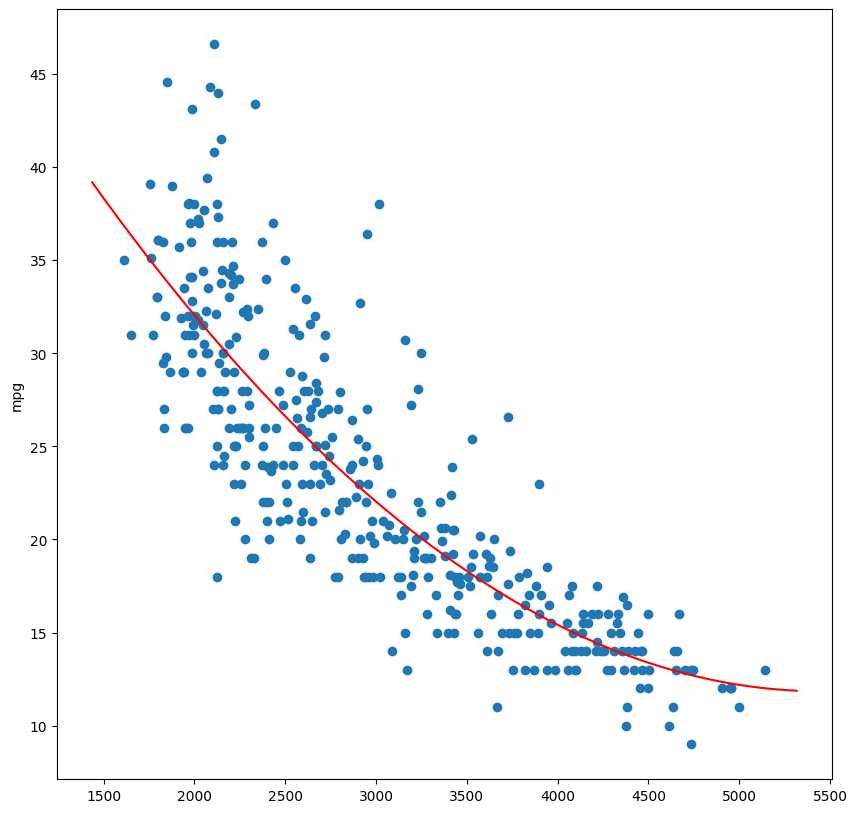

In [64]:
ax = subplots(figsize=(10, 10))[1]

ax.scatter(X["weight"], Y)
ax.set_ylabel("mpg")

b0 = result5.params.iloc[0]
b1 = result5.params.iloc[1]
b2 = result5.params.iloc[2]
xlim = ax.get_xlim()
fit_line_x = np.arange(xlim[0], xlim[1], 0.1)
fit_line_y = b2*np.power(fit_line_x, 2) + b1*fit_line_x + b0
ax.plot(fit_line_x, fit_line_y, c="r")


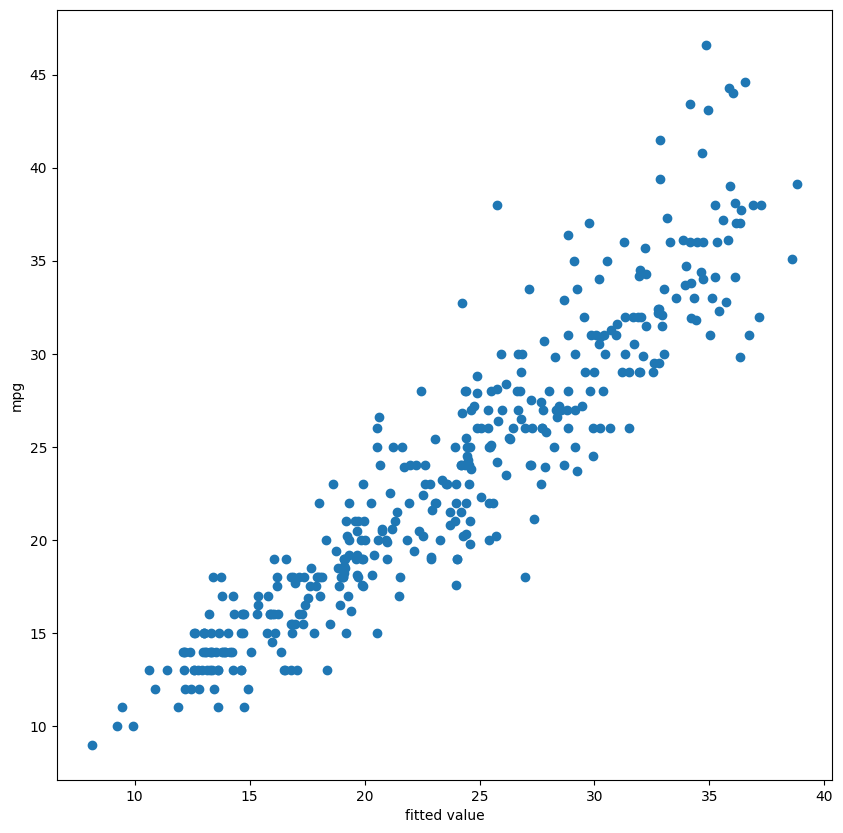

In [76]:
ax = subplots(figsize=(10, 10))[1]

ax.set_ylabel("mpg")
ax.set_xlabel("fitted value")

ax.scatter(result4.fittedvalues, Y)


In [71]:
anova_lm(total_results, result4, result6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,380.0,3179.428613,4.0,1072.783917,15.376536,1.147470e-11
2,389.0,6784.898509,-9.0,-3605.469896,22.968129,NaN
